In [1]:
import polars as pl
import numpy as np
import math
import statistics as stat
from lets_plot import *
from lets_plot.mapping import as_discrete
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
LetsPlot.setup_html()

In [3]:
df = pl.read_csv("dataset.csv", parse_dates = True).drop("ID")
df = df.with_row_count(name = "Time", offset = 0)

In [4]:
df.shape

(48120, 4)

In [5]:
df.describe()

describe,Time,DateTime,Junction,Vehicles
str,f64,str,f64,f64
"""count""",48120.0,"""48120""",48120.0,48120.0
"""null_count""",0.0,"""0""",0.0,0.0
"""mean""",24059.5,null,2.180549,22.791334
"""std""",13891.191814,null,0.966955,20.750063
"""min""",0.0,"""2015-11-01 00:...",1.0,1.0
"""max""",48119.0,"""2017-06-30 23:...",4.0,180.0
"""median""",24059.5,null,2.0,15.0


In [6]:
df_c1 = df.filter(pl.col("Junction") == 1)
df_c2 = df.filter(pl.col("Junction") == 2)
df_c3 = df.filter(pl.col("Junction") == 3)
df_c4 = df.filter(pl.col("Junction") == 4)
def df_splitter(df):    
    df_train = df.filter(pl.col("DateTime") < pl.datetime(2017, 6, 1))
    df_valid = df.filter(pl.col("DateTime") >= pl.datetime(2017, 6, 1))
    return df_train, df_valid

df_c1_train, df_c1_valid = df_splitter(df_c1)
df_c2_train, df_c2_valid = df_splitter(df_c2)
df_c3_train, df_c3_valid = df_splitter(df_c3)
df_c4_train, df_c4_valid = df_splitter(df_c4)



In [7]:

c1_color = 'blue'
c2_color = 'green'
c3_color = 'red'
c4_color = 'black'


plt_ts_c1 = \
    ggplot(df_c1_train)+\
    geom_line(aes(x = "DateTime", y = "Vehicles"), 
              color = c1_color, sampling = "none")+\
    scale_x_datetime(format = "%b %Y")+\
    theme_bw()+\
    labs(x = "Date", y = "Vehicles", title = "No of Taxis booked in Manhatten, New York")


plt_ts_c2 = \
    ggplot(df_c2_train)+\
    geom_line(aes(x = "DateTime", y = "Vehicles"), 
              color = c2_color, sampling = "none")+\
    scale_x_datetime(format = "%b %Y")+\
    theme_bw()+\
    labs(x = "Date", y = "Vehicles", title = "No of Taxis booked in Los Angels, California")

plt_ts_c3 = \
    ggplot(df_c3_train)+\
    geom_line(aes(x = "DateTime", y = "Vehicles"), 
              color = c3_color, sampling = "none")+\
    scale_x_datetime(format = "%b %Y")+\
    theme_bw()+\
    labs(x = "Date", y = "Vehicles", title = "No of Taxis booked in New Jersey City, New Jersey")

plt_ts_c4 = \
    ggplot(df_c4_train)+\
    geom_line(aes(x = "DateTime", y = "Vehicles"), 
              color = c4_color, sampling = "none")+\
    scale_x_datetime(format = "%b %Y")+\
    theme_bw()+\
    labs(x = "Date", y = "Vehicles", title = "No of Taxis booked in Dallas, Texas")


ts_plts = GGBunch()
ts_plts.add_plot(plt_ts_c1, 0, 0, 800, 300)
ts_plts.add_plot(plt_ts_c2, 0, 300, 800, 300)
ts_plts.add_plot(plt_ts_c3, 0, 600, 800, 300)
ts_plts.add_plot(plt_ts_c4, 0, 900, 800, 300)
ts_plts

In [8]:

df_c1_train = df_c1_train.with_columns(pl.col("DateTime").dt.year().alias("Year"))
df_c2_train = df_c2_train.with_columns(pl.col("DateTime").dt.year().alias("Year"))
df_c3_train = df_c3_train.with_columns(pl.col("DateTime").dt.year().alias("Year"))
df_c4_train = df_c4_train.with_columns(pl.col("DateTime").dt.year().alias("Year"))


df_c1_train = df_c1_train.with_columns(pl.col("DateTime").dt.month().alias("Month"))
df_c2_train = df_c2_train.with_columns(pl.col("DateTime").dt.month().alias("Month"))
df_c3_train = df_c3_train.with_columns(pl.col("DateTime").dt.month().alias("Month"))
df_c4_train = df_c4_train.with_columns(pl.col("DateTime").dt.month().alias("Month"))


df_c1_train = df_c1_train.with_columns(pl.col("DateTime").dt.day().alias("Day_month"))
df_c2_train = df_c2_train.with_columns(pl.col("DateTime").dt.day().alias("Day_month"))
df_c3_train = df_c3_train.with_columns(pl.col("DateTime").dt.day().alias("Day_month"))
df_c4_train = df_c4_train.with_columns(pl.col("DateTime").dt.day().alias("Day_month"))


df_c1_train = df_c1_train.with_columns(pl.col("DateTime").dt.weekday().alias("Day_week"))
df_c2_train = df_c2_train.with_columns(pl.col("DateTime").dt.weekday().alias("Day_week"))
df_c3_train = df_c3_train.with_columns(pl.col("DateTime").dt.weekday().alias("Day_week"))
df_c4_train = df_c4_train.with_columns(pl.col("DateTime").dt.weekday().alias("Day_week"))


df_c1_train = df_c1_train.with_columns(pl.col("DateTime").dt.hour().alias("Hour"))
df_c2_train = df_c2_train.with_columns(pl.col("DateTime").dt.hour().alias("Hour"))
df_c3_train = df_c3_train.with_columns(pl.col("DateTime").dt.hour().alias("Hour"))
df_c4_train = df_c4_train.with_columns(pl.col("DateTime").dt.hour().alias("Hour"))


In [9]:

def mean_vehicles(df) -> pl.Expr:
    return pl.col("Vehicles").mean()

df_train = pl.concat([df_c1_train, df_c2_train, df_c3_train, df_c4_train])

df_monthly = (
    df_train.groupby(["Junction", "Month"])
    .agg([mean_vehicles("Month")])
    .sort("Junction")
)


df_day_week = (
    df_train.groupby(["Junction", "Day_week"])
    .agg([mean_vehicles("Day_week")])
    .sort("Junction")
)


df_day_month = (
    df_train.groupby(["Junction", "Day_month"])
    .agg([mean_vehicles("Day_month")])
    .sort("Junction")
)


df_hourly = (
    df_train.groupby(["Junction", "Hour"])
    .agg([mean_vehicles("Hour")])
    .sort("Junction")
)


plt_monthly = \
    ggplot(df_monthly)+\
    geom_line(aes(x = "Month", y = "Vehicles", color = as_discrete("Junction")), size = 3)+\
    scale_x_discrete(breaks = list(range(1,13,1)))+\
    scale_color_manual(values = [c1_color, c2_color, c3_color, c4_color])+\
    theme_bw()+\
    labs(x = "Month", y = "No. of Taxis booked", title = "Average No. of Taxis booked in a Year")


plt_day_week = \
    ggplot(df_day_week)+\
    geom_line(aes(x = "Day_week", y = "Vehicles", color = as_discrete("Junction")), size = 3)+\
    scale_x_discrete(breaks = list(range(1,8,1)))+\
    scale_color_manual(values = [c1_color, c2_color, c3_color, c4_color])+\
    theme_bw()+\
    labs(x = "Day of the Week", y = "No. of Taxis booked", title = "Average No. of Taxis booked in a Week(Day of a week)")



plt_day_month = \
    ggplot(df_day_month)+\
    geom_line(aes(x = "Day_month", y = "Vehicles", color = as_discrete("Junction")), size = 3)+\
    scale_x_discrete(breaks = list(range(1,32,1)))+\
    scale_color_manual(values = [c1_color, c2_color, c3_color, c4_color])+\
    theme_bw()+\
    labs(x = "Day of the Month", y = "No. of Taxis booked", title = "Average No. of Taxis booked in a Month(Day of a month)")


plt_hourly = \
    ggplot(df_hourly)+\
    geom_line(aes(x = "Hour", y = "Vehicles", color = as_discrete("Junction")), size = 3)+\
    scale_color_manual(values = [c1_color, c2_color, c3_color, c4_color])+\
    theme_bw()+\
    labs(x = "Hour", y = "No. of Taxis booked", title = "Average No. of Taxis booked in a Day")


ts_plts_2 = GGBunch()
ts_plts_2.add_plot(plt_monthly, 0, 0, 900, 300)
ts_plts_2.add_plot(plt_day_week, 0, 300, 900, 300)
ts_plts_2.add_plot(plt_day_month, 0, 600, 900, 300)
ts_plts_2.add_plot(plt_hourly, 0, 900, 900, 300)
ts_plts_2

In [10]:

df_c1_train = df_c1_train.with_columns([
    (pl.when(pl.col("Day_week") == 7)
    .then(1)
    .when(pl.col("Day_week") == 6)
    .then(1)
    .otherwise(0))
    .alias("Weekend")
])


df_c2_train = df_c2_train.with_columns([
    (pl.when(pl.col("Day_week") == 7)
    .then(1)
    .when(pl.col("Day_week") == 6)
    .then(1)
    .otherwise(0))
    .alias("Weekend")
])


df_c1_train = df_c1_train.with_columns([
    (pl.when((pl.col("Hour") >= 0) & (pl.col("Hour") <= 5))
     .then(1)
     .otherwise(0))
     .alias("Mid_to_five")
])

df_c2_train = df_c2_train.with_columns([
    (pl.when((pl.col("Hour") >= 0) & (pl.col("Hour") <= 5))
     .then(1)
     .otherwise(0))
     .alias("Mid_to_five")
])

df_c3_train = df_c3_train.with_columns([
    (pl.when((pl.col("Hour") >= 0) & (pl.col("Hour") <= 5))
     .then(1)
     .otherwise(0))
     .alias("Mid_to_five")
])

df_c4_train = df_c4_train.with_columns([
    (pl.when((pl.col("Hour") >= 0) & (pl.col("Hour") <= 5))
     .then(1)
     .otherwise(0))
     .alias("Mid_to_five")
])


df_c1_train = df_c1_train.with_columns([
    (pl.when((pl.col("Hour") >= 5) & (pl.col("Hour") <= 12))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])

df_c2_train = df_c2_train.with_columns([
    (pl.when((pl.col("Hour") >= 5) & (pl.col("Hour") <= 12))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])

df_c3_train = df_c3_train.with_columns([
    (pl.when((pl.col("Hour") >= 5) & (pl.col("Hour") <= 12))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])

df_c4_train = df_c4_train.with_columns([
    (pl.when((pl.col("Hour") >= 5) & (pl.col("Hour") <= 12))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])



df_c1_train = df_c1_train.with_columns([
    (pl.when((pl.col("Hour") >= 12) & (pl.col("Hour") <= 0))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])

df_c2_train = df_c2_train.with_columns([
    (pl.when((pl.col("Hour") >= 12) & (pl.col("Hour") <= 0))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])

df_c3_train = df_c3_train.with_columns([
    (pl.when((pl.col("Hour") >= 12) & (pl.col("Hour") <= 0))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])

df_c4_train = df_c4_train.with_columns([
    (pl.when((pl.col("Hour") >= 12) & (pl.col("Hour") <= 0))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])

In [11]:

df_c1_train = df_c1_train.with_columns([
    (pl.col("Vehicles").log()).alias("Vehicles_log")
])


df_c2_train = df_c2_train.with_columns([
    (pl.col("Vehicles").log()).alias("Vehicles_log")
])


df_c3_train = df_c3_train.with_columns([
    (pl.col("Vehicles").log()).alias("Vehicles_log")
])


df_c4_train = df_c4_train.with_columns([
    (pl.col("Vehicles").log()).alias("Vehicles_log")
])

In [12]:

plt_ts_c1_log = \
    ggplot(df_c1_train)+\
    geom_line(aes(x = "DateTime", y = "Vehicles_log"), 
              color = c1_color, sampling = "none")+\
    scale_x_datetime(format = "%b %Y")+\
    theme_bw()+\
    labs(x = "Date", y = "Log Vehicles", title = "No. of Taxis at Manhatten(After Log Transform)")


plt_ts_c2_log = \
    ggplot(df_c2_train)+\
    geom_line(aes(x = "DateTime", y = "Vehicles_log"), 
              color = c2_color, sampling = "none")+\
    scale_x_datetime(format = "%b %Y")+\
    theme_bw()+\
    labs(x = "Date", y = "Log Vehicles", title = "No. of Taxis at Los Angels(After Log Transform)")


plt_ts_c3_log = \
    ggplot(df_c3_train)+\
    geom_line(aes(x = "DateTime", y = "Vehicles_log"), 
              color = c3_color, sampling = "none")+\
    scale_x_datetime(format = "%b %Y")+\
    theme_bw()+\
    labs(x = "Date", y = "Log Vehicles", title = "No. of Taxis at New Jersey City (After Log Transform)")


plt_ts_c4_log = \
    ggplot(df_c4_train)+\
    geom_line(aes(x = "DateTime", y = "Vehicles_log"), 
              color = c4_color, sampling = "none")+\
    scale_x_datetime(format = "%b %Y")+\
    theme_bw()+\
    labs(x = "Date", y = "Log Vehicles", title = "No. of Taxis at Dallas (After Log Transform)")


ts_plts_log = GGBunch()
ts_plts_log.add_plot(plt_ts_c1_log, 0, 0, 500, 300)
ts_plts_log.add_plot(plt_ts_c1, 500, 0, 500, 300)
ts_plts_log.add_plot(plt_ts_c2_log, 0, 320, 500, 300)
ts_plts_log.add_plot(plt_ts_c2, 500, 320, 500, 300)
ts_plts_log.add_plot(plt_ts_c3_log, 0, 640, 500, 300)
ts_plts_log.add_plot(plt_ts_c3, 500, 640, 500, 300)
ts_plts_log.add_plot(plt_ts_c4_log, 0, 960, 500, 300)
ts_plts_log.add_plot(plt_ts_c4, 500, 960, 500, 300)
ts_plts_log

In [13]:

df_c1_valid = df_c1_valid.with_columns(pl.col("DateTime").dt.year().alias("Year"))
df_c2_valid = df_c2_valid.with_columns(pl.col("DateTime").dt.year().alias("Year"))
df_c3_valid = df_c3_valid.with_columns(pl.col("DateTime").dt.year().alias("Year"))
df_c4_valid = df_c4_valid.with_columns(pl.col("DateTime").dt.year().alias("Year"))


df_c1_valid = df_c1_valid.with_columns(pl.col("DateTime").dt.month().alias("Month"))
df_c2_valid = df_c2_valid.with_columns(pl.col("DateTime").dt.month().alias("Month"))
df_c3_valid = df_c3_valid.with_columns(pl.col("DateTime").dt.month().alias("Month"))
df_c4_valid = df_c4_valid.with_columns(pl.col("DateTime").dt.month().alias("Month"))


df_c1_valid = df_c1_valid.with_columns(pl.col("DateTime").dt.day().alias("Day_month"))
df_c2_valid = df_c2_valid.with_columns(pl.col("DateTime").dt.day().alias("Day_month"))
df_c3_valid = df_c3_valid.with_columns(pl.col("DateTime").dt.day().alias("Day_month"))
df_c4_valid = df_c4_valid.with_columns(pl.col("DateTime").dt.day().alias("Day_month"))


df_c1_valid = df_c1_valid.with_columns(pl.col("DateTime").dt.weekday().alias("Day_week"))
df_c2_valid = df_c2_valid.with_columns(pl.col("DateTime").dt.weekday().alias("Day_week"))
df_c3_valid = df_c3_valid.with_columns(pl.col("DateTime").dt.weekday().alias("Day_week"))
df_c4_valid = df_c4_valid.with_columns(pl.col("DateTime").dt.weekday().alias("Day_week"))


df_c1_valid = df_c1_valid.with_columns(pl.col("DateTime").dt.hour().alias("Hour"))
df_c2_valid = df_c2_valid.with_columns(pl.col("DateTime").dt.hour().alias("Hour"))
df_c3_valid = df_c3_valid.with_columns(pl.col("DateTime").dt.hour().alias("Hour"))
df_c4_valid = df_c4_valid.with_columns(pl.col("DateTime").dt.hour().alias("Hour"))


df_c1_valid = df_c1_valid.with_columns([
    (pl.when(pl.col("Day_week") == 7)
    .then(1)
    .when(pl.col("Day_week") == 6)
    .then(1)
    .otherwise(0))
    .alias("Weekend")
])


df_c2_valid = df_c2_valid.with_columns([
    (pl.when(pl.col("Day_week") == 7)
    .then(1)
    .when(pl.col("Day_week") == 6)
    .then(1)
    .otherwise(0))
    .alias("Weekend")
])

df_c1_valid = df_c1_valid.with_columns([
    (pl.when((pl.col("Hour") >= 0) & (pl.col("Hour") <= 5))
     .then(1)
     .otherwise(0))
     .alias("Mid_to_five")
])

df_c2_valid = df_c2_valid.with_columns([
    (pl.when((pl.col("Hour") >= 0) & (pl.col("Hour") <= 5))
     .then(1)
     .otherwise(0))
     .alias("Mid_to_five")
])

df_c3_valid = df_c3_valid.with_columns([
    (pl.when((pl.col("Hour") >= 0) & (pl.col("Hour") <= 5))
     .then(1)
     .otherwise(0))
     .alias("Mid_to_five")
])

df_c4_valid = df_c4_valid.with_columns([
    (pl.when((pl.col("Hour") >= 0) & (pl.col("Hour") <= 5))
     .then(1)
     .otherwise(0))
     .alias("Mid_to_five")
])


df_c1_valid = df_c1_valid.with_columns([
    (pl.when((pl.col("Hour") >= 5) & (pl.col("Hour") <= 12))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])

df_c2_valid = df_c2_valid.with_columns([
    (pl.when((pl.col("Hour") >= 5) & (pl.col("Hour") <= 12))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])

df_c3_valid = df_c3_valid.with_columns([
    (pl.when((pl.col("Hour") >= 5) & (pl.col("Hour") <= 12))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])

df_c4_valid = df_c4_valid.with_columns([
    (pl.when((pl.col("Hour") >= 5) & (pl.col("Hour") <= 12))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])



df_c1_valid = df_c1_valid.with_columns([
    (pl.when((pl.col("Hour") >= 12) & (pl.col("Hour") <= 0))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])
df_c2_valid = df_c2_valid.with_columns([
    (pl.when((pl.col("Hour") >= 12) & (pl.col("Hour") <= 0))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])

df_c3_valid = df_c3_valid.with_columns([
    (pl.when((pl.col("Hour") >= 12) & (pl.col("Hour") <= 0))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])

df_c4_valid = df_c4_valid.with_columns([
    (pl.when((pl.col("Hour") >= 12) & (pl.col("Hour") <= 0))
     .then(1)
     .otherwise(0))
     .alias("Five_to_noon")
])


df_c1_valid = df_c1_valid.with_columns([
    (pl.col("Vehicles").log()).alias("Vehicles_log")
])


df_c2_valid = df_c2_valid.with_columns([
    (pl.col("Vehicles").log()).alias("Vehicles_log")
])


df_c3_valid = df_c3_valid.with_columns([
    (pl.col("Vehicles").log()).alias("Vehicles_log")
])

df_c4_valid = df_c4_valid.with_columns([
    (pl.col("Vehicles").log()).alias("Vehicles_log")
])

In [14]:

def objective(trial):
    
    xtrain = df_train.drop(["DateTime", "Junction", "Vehicles", "Vehicles_log"]).to_numpy()
    xvalid = df_valid.drop(["DateTime", "Junction", "Vehicles", "Vehicles_log"]).to_numpy()

    ytrain = df_train.get_column("Vehicles_log").to_numpy()
    yvalid = df_valid.get_column("Vehicles_log").to_numpy()
    
    reg_model = LinearRegression().fit(xtrain, ytrain)
    reg_preds_train = reg_model.predict(xtrain)
    reg_preds_valid = reg_model.predict(xvalid)
    
    reg_resid_train = (ytrain - reg_preds_train)
    reg_resid_valid = (yvalid - reg_preds_valid)
    

    params = {'objective': 'reg:squarederror',
              'eval_metric': 'rmse',
              'seed': 19970507,
              'eta': trial.suggest_float("eta", 1e-2, 0.25, log = True),
              'max_depth': trial.suggest_int("max_depth", 1, 7),
              'lambda': trial.suggest_float("lambda", 1e-8, 100.0, log = True),
              'alpha': trial.suggest_float("alpha", 1e-8, 100.0, log = True),
             }
    

    dmat_train = xgb.DMatrix(xtrain, label = reg_resid_train)
    dmat_valid = xgb.DMatrix(xvalid, label = reg_resid_valid) 
    watchlist = [(dmat_train, 'train'), (dmat_valid, 'eval')]
    xgb_model = xgb.train(params, 
                          dtrain = dmat_train, 
                          num_boost_round = trial.suggest_int("num_boost_round", 20, 3000),
                          evals = watchlist,
                          verbose_eval = False)
    
    xgb_preds_valid = xgb_model.predict(dmat_valid) 
    preds = (reg_preds_valid + xgb_preds_valid)
    return math.sqrt(mean_squared_error(yvalid, preds))

In [15]:
import optuna
import xgboost as xgb

optuna.logging.set_verbosity(optuna.logging.WARNING) # Suppress log messages 


df_train = df_c1_train
df_valid = df_c1_valid

study_c1 = optuna.create_study(direction = 'minimize')
study_c1.optimize(objective, n_trials = 5)


df_train = df_c2_train
df_valid = df_c2_valid

study_c2 = optuna.create_study(direction = 'minimize')
study_c2.optimize(objective, n_trials = 5)


df_train = df_c3_train
df_valid = df_c3_valid

study_c3 = optuna.create_study(direction = 'minimize')
study_c3.optimize(objective, n_trials = 5)


df_train = df_c4_train
df_valid = df_c4_valid

study_c4 = optuna.create_study(direction = 'minimize')
study_c4.optimize(objective, n_trials = 5)

In [16]:
import optuna
def final_model_preds(optuna_params, df_train, df_valid, junction):
   
    xtrain = df_train.drop(["DateTime", "Junction", "Vehicles", "Vehicles_log"]).to_numpy()
    xvalid = df_valid.drop(["DateTime", "Junction", "Vehicles", "Vehicles_log"]).to_numpy()
    ytrain = df_train.get_column("Vehicles_log").to_numpy()
    yvalid = df_valid.get_column("Vehicles_log").to_numpy()
    
    yvalid_orig = df_valid.get_column("Vehicles").to_numpy()
    reg_model = LinearRegression().fit(xtrain, ytrain)
    reg_preds_train = reg_model.predict(xtrain)
    reg_preds_valid = reg_model.predict(xvalid)
    reg_resid_train = (ytrain - reg_preds_train)
    reg_resid_valid = (yvalid - reg_preds_valid)
    best_params = {'objective': 'reg:squarederror',
                  'eval_metric': 'rmse',
                  'seed': 19970507,
                  'eta': optuna_params['eta'],
                  'max_depth': optuna_params['max_depth'],
                  'lambda': optuna_params['lambda'],
                  'alpha': optuna_params['alpha'],
                 }


    dmat_train = xgb.DMatrix(xtrain, label = reg_resid_train)
    dmat_valid = xgb.DMatrix(xvalid, label = reg_resid_valid) 
    watchlist = [(dmat_train, 'train'), (dmat_valid, 'eval')]
    xgb_model = xgb.train(best_params, 
                          dtrain = dmat_train, 
                          num_boost_round = optuna_params['num_boost_round'],
                          evals = watchlist,
                          early_stopping_rounds = 100, 
                          verbose_eval = False)
    
    xgb_preds_valid = xgb_model.predict(dmat_valid) 
    preds = (reg_preds_valid + xgb_preds_valid)
    preds_orig = [math.exp(x) for x in preds]
    rmse = math.sqrt(mean_squared_error(yvalid_orig, preds_orig))
    print("Validation set RMSE for City", junction, ": ", rmse)
    return preds_orig, rmse

In [17]:

preds_c1, valid_rmse_c1 = final_model_preds(optuna_params = study_c1.best_params, 
                                            df_train = df_c1_train, 
                                            df_valid = df_c1_valid,
                                            junction = 1)
preds_c2, valid_rmse_c2 = final_model_preds(optuna_params = study_c2.best_params, 
                                            df_train = df_c2_train, 
                                            df_valid = df_c2_valid,
                                            junction = 2)
preds_c3, valid_rmse_c3 = final_model_preds(optuna_params = study_c3.best_params, 
                                            df_train = df_c3_train, 
                                            df_valid = df_c3_valid,
                                            junction = 3)
preds_c4, valid_rmse_c4 = final_model_preds(optuna_params = study_c4.best_params, 
                                            df_train = df_c4_train, 
                                            df_valid = df_c4_valid,
                                            junction = 4)

Validation set RMSE for City 1 :  6.757623935505035
Validation set RMSE for City 2 :  3.7628343190476983
Validation set RMSE for City 3 :  8.75938854549764
Validation set RMSE for City 4 :  3.458826743591861


In [18]:

df_c1_labels = pl.DataFrame(
    {'DateTime': df_c1_valid.get_column("DateTime"), 
     'Vehicles': df_c1_valid.get_column("Vehicles"), 
     'Group': ["Label"]*len(df_c1_valid)}
)

df_c1_preds = pl.DataFrame(
    {'DateTime_preds': df_c1_valid.get_column("DateTime"), 
     'Vehicles_preds': preds_c1, 
     'Group_preds': ["Predictions"]*len(df_c1_valid)}
)

df_c1 = (
    pl.concat([df_c1_labels, df_c1_preds], how = 'horizontal')
    .with_columns(
        (pl.lit("True Values").alias("Group_label")),
        (pl.lit("Predictions").alias("Group_pred")))
)

plt_c1 = \
    ggplot(df_c1)+\
    geom_line(aes(x = "DateTime", y = "Vehicles", color = "Group_label"), 
              sampling = "none", size = 0.5, show_legend = True)+\
    geom_line(aes(x = "DateTime", y = "Vehicles_preds", color = "Group_pred"), 
              sampling = "none", size = 0.5, show_legend = True)+\
    scale_color_manual(values = ['white', c1_color])+\
    scale_x_datetime(format = "%Y-%m-%d")+\
    scale_y_continuous(limits = [20, 145])+\
    theme_bw()+\
    labs(x = "Date", y = "No. of Taxis", title = "Predicted count of taxis in in Manhatten")


df_c2_labels = pl.DataFrame(
    {'DateTime': df_c2_valid.get_column("DateTime"), 
     'Vehicles': df_c2_valid.get_column("Vehicles"), 
     'Group': ["Label"]*len(df_c2_valid)}
)

df_c2_preds = pl.DataFrame(
    {'DateTime_preds': df_c2_valid.get_column("DateTime"), 
     'Vehicles_preds': preds_c2, 
     'Group_preds': ["Predictions"]*len(df_c2_valid)}
)

df_c2 = (
    pl.concat([df_c2_labels, df_c2_preds], how = 'horizontal')
    .with_columns(
        (pl.lit("True Values").alias("Group_label")),
        (pl.lit("Predictions").alias("Group_pred")))
)

plt_c2 = \
    ggplot(df_c2)+\
    geom_line(aes(x = "DateTime", y = "Vehicles", color = "Group_label"), 
              sampling = "none", size = 0.5, show_legend = True)+\
    geom_line(aes(x = "DateTime", y = "Vehicles_preds", color = "Group_pred"), 
              sampling = "none", size = 0.5, show_legend = True)+\
    scale_color_manual(values = ['white', c2_color])+\
    scale_x_datetime(format = "%Y-%m-%d")+\
    scale_y_continuous(limits = [20, 50])+\
    theme_bw()+\
    labs(x = "Date", y = "No. of Taxis", title = "Predicted count of taxis in in Los Angels")


df_c3_labels = pl.DataFrame(
    {'DateTime': df_c3_valid.get_column("DateTime"), 
     'Vehicles': df_c3_valid.get_column("Vehicles"), 
     'Group': ["Label"]*len(df_c3_valid)}
)

df_c3_preds = pl.DataFrame(
    {'DateTime_preds': df_c3_valid.get_column("DateTime"), 
     'Vehicles_preds': preds_c3, 
     'Group_preds': ["Predictions"]*len(df_c3_valid)}
)

df_c3 = (
    pl.concat([df_c3_labels, df_c3_preds], how = 'horizontal')
    .with_columns(
        (pl.lit("True Values").alias("Group_label")),
        (pl.lit("Predictions").alias("Group_pred")))
)
plt_c3 = \
    ggplot(df_c3)+\
    geom_line(aes(x = "DateTime", y = "Vehicles", color = "Group_label"), 
              sampling = "none", size = 0.5, show_legend = True)+\
    geom_line(aes(x = "DateTime", y = "Vehicles_preds", color = "Group_pred"), 
              sampling = "none", size = 0.5, show_legend = True)+\
    scale_color_manual(values = ['white', c3_color])+\
    scale_x_datetime(format = "%Y-%m-%d")+\
    scale_y_continuous(limits = [20, 120])+\
    theme_bw()+\
    labs(x = "Date", y = "No. of Taxis", title = "Predicted count of taxis in New Jersey City")


df_c4_labels = pl.DataFrame(
    {'DateTime': df_c4_valid.get_column("DateTime"), 
     'Vehicles': df_c4_valid.get_column("Vehicles"), 
     'Group': ["Label"]*len(df_c4_valid)}
)

df_c4_preds = pl.DataFrame(
    {'DateTime_preds': df_c4_valid.get_column("DateTime"), 
     'Vehicles_preds': preds_c4, 
     'Group_preds': ["Predictions"]*len(df_c4_valid)}
)

df_c4 = (
    pl.concat([df_c4_labels, df_c4_preds], how = 'horizontal')
    .with_columns(
        (pl.lit("True Values").alias("Group_label")),
        (pl.lit("Predictions").alias("Group_pred")))
)

plt_c4 = \
    ggplot(df_c4)+\
    geom_line(aes(x = "DateTime", y = "Vehicles", color = "Group_label"), 
              sampling = "none", size = 0.5, show_legend = True)+\
    geom_line(aes(x = "DateTime", y = "Vehicles_preds", color = "Group_pred"), 
              sampling = "none", size = 0.5, show_legend = True)+\
    scale_color_manual(values = ['white', c4_color])+\
    scale_x_datetime(format = "%Y-%m-%d")+\
    scale_y_continuous(limits = [0, 40])+\
    theme_bw()+\
    labs(x = "Date", y = "No. of Taxis", title = "Predicted count of taxis in Dallas City")


#results_plts = GGBunch()
#results_plts.add_plot(plt_c1, 0, 0, 900, 300)
#results_plts.add_plot(plt_c2, 0, 300, 900, 300)
#results_plts.add_plot(plt_c3, 0, 600, 900, 300)
#results_plts.add_plot(plt_c4, 0, 900, 900, 300)
#results_plts



## Taxi Ride Demand Prediction Application

C:\Users\Dheeraj - UNT\AppData\Local\Temp\ipykernel_604\4074037811.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\Dheeraj - UNT\AppData\Local\Temp\ipykernel_604\4074037811.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\Dheeraj - UNT\AppData\Local\Temp\ipykernel_604\4074037811.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\Dheeraj - UNT\AppData\Local\Temp\ipykernel_604\4074037811.py:118: UserWarning: FixedFormatter should only be used together with FixedLocator


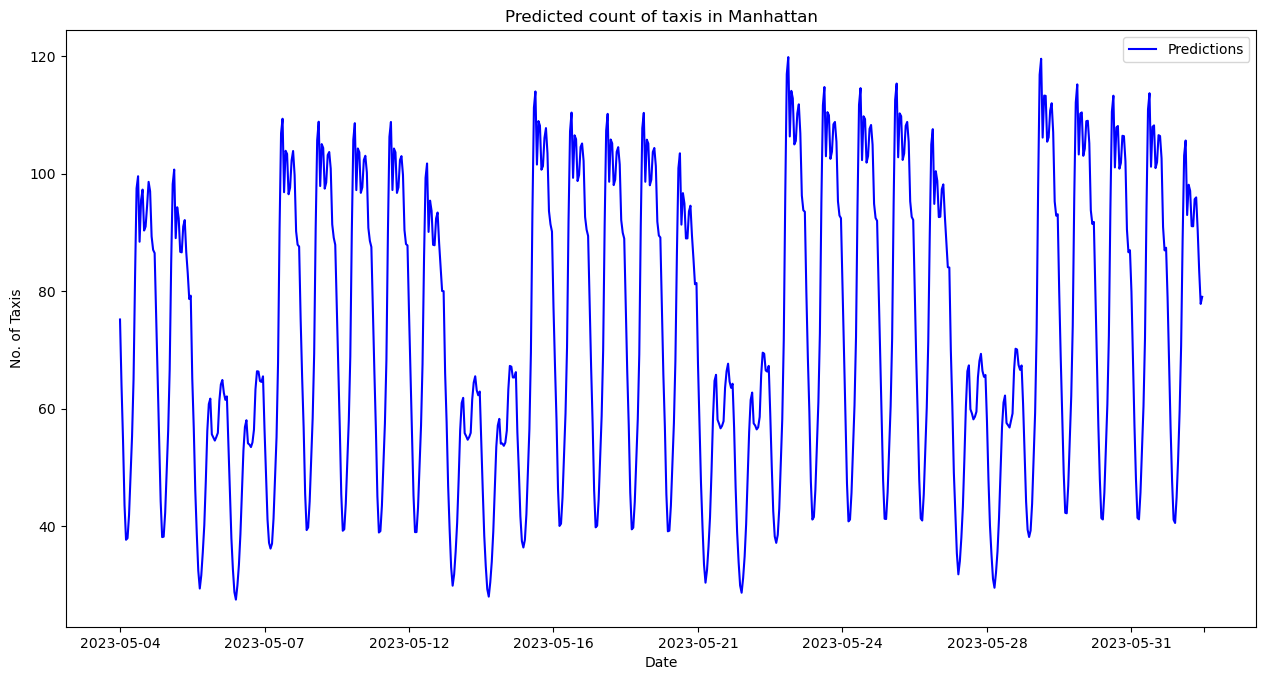

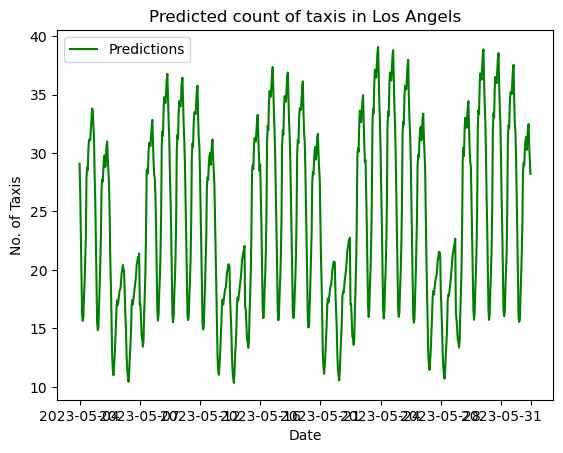

In [ ]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import pandas as pd
from tkinter import PhotoImage
from plotnine import *
from PIL import Image, ImageTk

# Define the function to plot the graph
def man():
    fig, ax = plt.subplots()
    #ax.plot(df_c1.get_column('DateTime'), df_c1.get_column('Vehicles'), color='white')
    ax.plot(df_c1.get_column('DateTime_preds'), preds_c1, color=c1_color, label='Predictions')
    ax.set_xlabel('Date')
    ax.set_ylabel('No. of Taxis')
    ax.set_title('Predicted count of taxis in Manhattan')
    ax.legend()

    # Set the x-tick labels to your desired dates
    dates = ['2023-05-04', '2023-05-07', '2023-05-12', '2023-05-16', '2023-05-21', '2023-05-24', '2023-05-28', '2023-05-31']
    ax.set_xticklabels(dates)

    # Create a GUI window
    root = tk.Tk()
    root.title('Prediction of the plot for the city1(Manhattan)')

    # Embed the plot in the GUI
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    # Create a button to close the window
    button = tk.Button(root, text='Close', command=root.quit)
    button.pack()

    # Run the GUI
    tk.mainloop()

    
    
    
#----------------------------------------------------------------------------------

def la():
    fig, ax = plt.subplots()
    #ax.plot(df_c2.get_column('DateTime'), df_c2.get_column('Vehicles'), color='white')
    ax.plot(df_c2.get_column('DateTime_preds'), preds_c2, color=c2_color, label='Predictions')
    ax.set_xlabel('Date')
    ax.set_ylabel('No. of Taxis')
    ax.set_title('Predicted count of taxis in Los Angels')
    ax.legend()
    
    # Set the x-tick labels to your desired dates
    dates = ['2023-05-04', '2023-05-07', '2023-05-12', '2023-05-16', '2023-05-21', '2023-05-24', '2023-05-28', '2023-05-31']
    ax.set_xticklabels(dates)

    # Create a GUI window
    root = tk.Tk()
    root.title('Prediction of the plot for the city2(Los Angels)')

    # Embed the plot in the GUI
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    # Create a button to close the window
    button = tk.Button(root, text='Close', command=root.quit)
    button.pack()

    # Run the GUI
    tk.mainloop()
    
    
#----------------------------------------------------------------------------------

def nj():
    fig, ax = plt.subplots()
    #ax.plot(df_c3.get_column('DateTime'), df_c3.get_column('Vehicles'), color='white')
    ax.plot(df_c3.get_column('DateTime_preds'), preds_c3, color=c3_color, label='Predictions')
    ax.set_xlabel('Date')
    ax.set_ylabel('No. of Taxis')
    ax.set_title('Predicted count of taxis in New Jersey City')
    ax.legend()
    
    # Set the x-tick labels to your desired dates
    dates = ['2023-05-04', '2023-05-07', '2023-05-12', '2023-05-16', '2023-05-21', '2023-05-24', '2023-05-28', '2023-05-31']
    ax.set_xticklabels(dates)
    
    

    # Create a GUI window
    root = tk.Tk()
    root.title('Prediction of the plot for the city3(New Jersey)')

    # Embed the plot in the GUI
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    # Create a button to close the window
    button = tk.Button(root, text='Close', command=root.quit)
    button.pack()

    # Run the GUI
    tk.mainloop()
    
    
#----------------------------------------------------------------------------------

def da():
    fig, ax = plt.subplots()
    #ax.plot(df_c4.get_column('DateTime'), df_c4.get_column('Vehicles'), color='white')
    ax.plot(df_c4.get_column('DateTime_preds'), preds_c4, color=c4_color, label='Predictions')
    ax.set_xlabel('Date')
    ax.set_ylabel('No. of Taxis')
    ax.set_title('Predicted count of taxis count in Dallas')
    ax.legend()
    
    # Set the x-tick labels to your desired dates
    dates = ['2023-05-04', '2023-05-07', '2023-05-12', '2023-05-16', '2023-05-21', '2023-05-24', '2023-05-28', '2023-05-31']
    ax.set_xticklabels(dates)
    
    
    # Create a GUI window
    root = tk.Tk()
    root.title('Prediction of the plot for the city4(Dallas)')

    # Embed the plot in the GUI
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    # Create a button to close the window
    button = tk.Button(root, text='Close', command=root.quit)
    button.pack()

    # Run the GUI
    tk.mainloop()    
    
    
#----------------------------------------------------------------------------------   
    

# Create the GUI
root = tk.Tk()
root.title('Taxi Ride Demand Prediction')


heading_label = tk.Label(root, text='Taxi Ride Demand Prediction Application', font=('Arial', 20, 'bold'))
heading_label.pack()

# Load the image
image = PhotoImage(file='image.png')

#Create a label widget to display the image
label = tk.Label(root, image=image)
label.pack()

#--------------------------------------------------------------------


        
        
        
#-----------------------------------------------------------



# Create a button to plot the graph
button = tk.Button(root, text='Predict the plot for the city1(Manhatten)', command=man)
button.pack()
button = tk.Button(root, text='Predict the plot for the city2(Los Angels)', command=la)
button.pack()
button = tk.Button(root, text='Predict the plot for the city3(New Jersey)', command=nj)
button.pack()
button = tk.Button(root, text='Predict the plot for the city4(Dallas)', command=da)
button.pack()

# Run the GUI

root.mainloop()
